In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz 
from sklearn.metrics import confusion_matrix, accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data = pd.read_csv('/kaggle/input/water-potability/water_potability.csv')
data.head()

In [ ]:
data.isnull().any()

In [ ]:
data.info()

In [ ]:
def missing_value(data,col_data):
    data[col_data] = data[col_data].fillna(data[col_data].mean())
missing_value(data,'ph')
missing_value(data,'Sulfate')
missing_value(data,'Trihalomethanes')
data.isnull().any()

In [ ]:
data.describe()

**Data Visualization**

In [ ]:
sns.countplot(x='Potability',data=data)

In [ ]:
sns.boxenplot(x='Potability',y='ph',data=data)

In [ ]:
sns.boxenplot(x='Potability',y='Sulfate',data=data)

In [ ]:
sns.boxenplot(x='Potability',y='Turbidity',data=data)

In [ ]:
sns.boxenplot(x='Potability',y='Solids',data=data) 

In [ ]:
sns.boxenplot(x='Potability',y='Chloramines',data=data) 

In [ ]:
sns.boxenplot(x='Potability',y='Chloramines',data=data) 

In [ ]:
sns.boxenplot(x='Potability',y='Conductivity',data=data) 

In [ ]:
sns.boxenplot(x='Potability',y='Organic_carbon',data=data)

In [ ]:
sns.boxenplot(x='Potability',y='Trihalomethanes',data=data)

In [ ]:
sns.boxenplot(x='Potability',y='Hardness',data=data)

In [ ]:
sns.stripplot(y='ph',x='Potability',hue ='Potability',data=data)

In [ ]:
sns.pairplot(data=data,hue="Potability")

In [ ]:
cols = ['ph','Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon'
        ,'Trihalomethanes', 'Turbidity']
def boxplot(data,columnName):
    sns.catplot(x='Potability',y=columnName,data=data)
for coulmns in tqdm(cols):
    boxplot(data,coulmns)   

In [ ]:
plt.pie(x=data['Potability'].value_counts(),explode=(0.1,0)
        ,shadow=True, startangle=90
        ,labels=['0','1'],autopct='%1.1f%%')
plt.title('Potability of water')
plt.show()

**Split and Scaling data**

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_scaling = StandardScaler().fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_scaling, y
                                                    , test_size=0.33)

**Creating Logistic Regrssion Model**

In [ ]:
lg = LogisticRegression().fit(x_train,y_train)
y_pred_lg = lg.predict(x_test)
score_test = accuracy_score(y_test,y_pred_lg)*100
print('acc lg = {}'.format(score_test))

In [ ]:
print(classification_report(y_test,y_pred_lg))

In [ ]:
conf = confusion_matrix(y_test,y_pred_lg)
sns.heatmap(conf,annot=True,fmt='d')

**Creating GaussianNB Model**

In [ ]:
GN = GaussianNB().fit(x_train,y_train)
y_pred_GN = GN.predict(x_test)
print('acc GN = {}'.format(accuracy_score(y_test,y_pred_GN)*100))

In [ ]:
print(classification_report(y_test,y_pred_lg))

In [ ]:
conf = confusion_matrix(y_test,y_pred_GN)
sns.heatmap(conf,annot=True,fmt='d')

**Creating SVC Model**

kernel(linear)

In [ ]:
svc_linear = SVC(kernel='linear').fit(x_train,y_train)
y_pred_svc_linear = svc_linear.predict(x_test)
print('acc svc linear = {}'.format(accuracy_score(y_test,y_pred_svc_linear)*100))

In [ ]:
conf = confusion_matrix(y_test,y_pred_svc_linear)
sns.heatmap(conf,annot=True,fmt='d')

**Creating SVC Model**

kernel(rbf)

In [ ]:
svc_rbf = SVC(kernel='rbf').fit(x_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(x_test)
print('acc svc rbf = {}'.format(accuracy_score(y_test,y_pred_svc_rbf)*100))

In [ ]:
conf = confusion_matrix(y_test,y_pred_svc_rbf)
sns.heatmap(conf,annot=True,fmt='d')

**Creating SVC Model**

kernel(poly)

In [ ]:
svc_poly = SVC(kernel='poly',degree=6).fit(x_train,y_train)
y_pred_svc_poly = svc_poly.predict(x_test)
print('acc svc poly = {}'.format(accuracy_score(y_test,y_pred_svc_poly)*100))

In [ ]:
conf = confusion_matrix(y_test,y_pred_svc_poly)
sns.heatmap(conf,annot=True,fmt='d')

**Creating DecisionTreeClassifier Model**

In [ ]:
dt = DecisionTreeClassifier(max_leaf_nodes=6).fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print('acc DT = {}'.format(accuracy_score(y_test,y_pred_dt)*100))

In [ ]:
conf = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(conf,annot=True,fmt='d')

In [ ]:
export_graphviz(dt, out_file ='tree.dot',
               feature_names =cols)

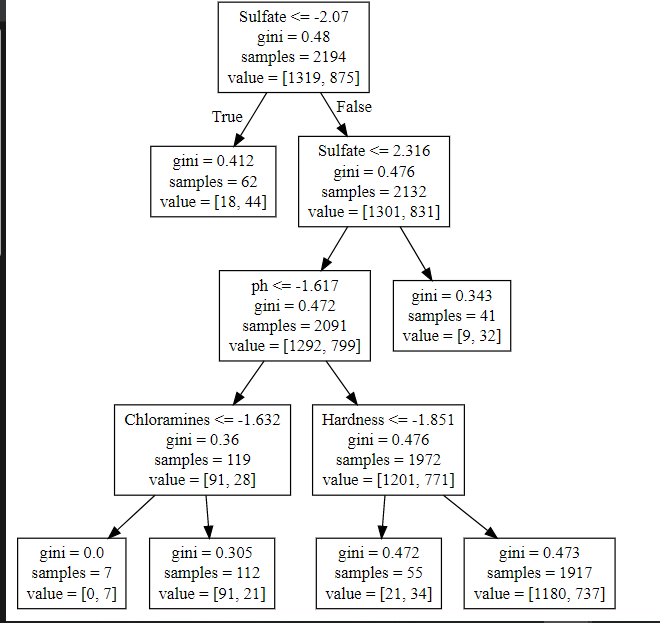

**Creating RandomForestClassifier Model**

In [ ]:
rf = RandomForestClassifier(max_depth=10, random_state=0).fit(x_train,y_train)
y_pred_rf = rf.predict(x_test) 
print('acc rf = {}'.format(accuracy_score(y_test,y_pred_rf)*100))

In [ ]:
conf = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(conf,annot=True,fmt='d')

**Creating KNeighborsClassifier Model**

In [ ]:
nc = KNeighborsClassifier(n_neighbors=8).fit(x_train,y_train)
y_pred_nc = nc.predict(x_test)
print('acc nc = {}'.format(accuracy_score(y_test,y_pred_nc)*100))

In [ ]:
conf = confusion_matrix(y_test,y_pred_nc)
sns.heatmap(conf,annot=True,fmt='d')

**Thanks for reading**